<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/gg_29_GD_regression_classification_rev9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형회귀)

## Example of one feature (x1)

In [1]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

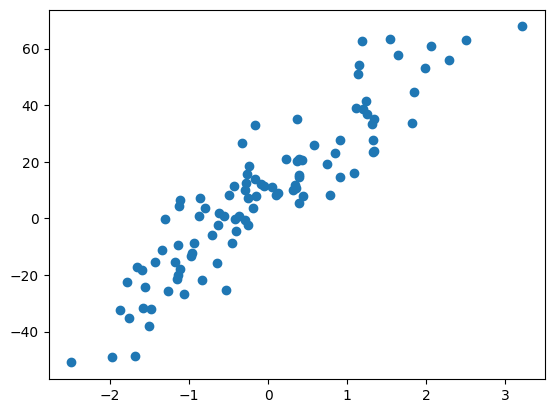

In [2]:
n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [3]:
# --------
w=np.random.randn()
b=np.random.randn()

lr = 0.02          # learning rate
n_epoch = 300
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* 2 * ((y_pred - y)*x).mean()
    b = b - lr* 2 * (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)

print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 785.3822954173754 w= 1.3422378221660285 b= -0.13738929898407432
epoch= 10 loss= 361.75718153747965 w= 9.56345575137475 b= 2.9021746325268665
epoch= 20 loss= 207.3046358462506 w= 14.401226282973088 b= 5.061253567684243
epoch= 30 loss= 149.97163917273028 w= 17.25421189044713 b= 6.5781254745073
epoch= 40 loss= 128.27066710067166 w= 18.940785937645476 b= 7.634672780917862
epoch= 50 loss= 119.8877258164468 w= 19.94049899110321 b= 8.36555669356779
epoch= 60 loss= 116.58261608132885 w= 20.534828358056537 b= 8.868361436914048
epoch= 70 loss= 115.25361817383823 w= 20.88930061781747 b= 9.212697188224428
epoch= 80 loss= 114.70938507810432 w= 21.101460617059523 b= 9.447628891020248
epoch= 90 loss= 114.48285503424074 w= 21.22892623153856 b= 9.607419867244316
epoch= 100 loss= 114.38722547550968 w= 21.305819670514552 b= 9.715821273692331
epoch= 110 loss= 114.3463737229068 w= 21.3524065712966 b= 9.789199872532375
epoch= 120 loss= 114.32875149047005 w= 21.380760818043967 b= 9.83877951108

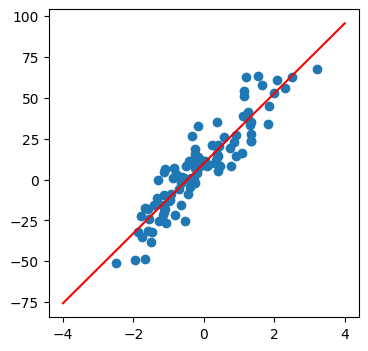

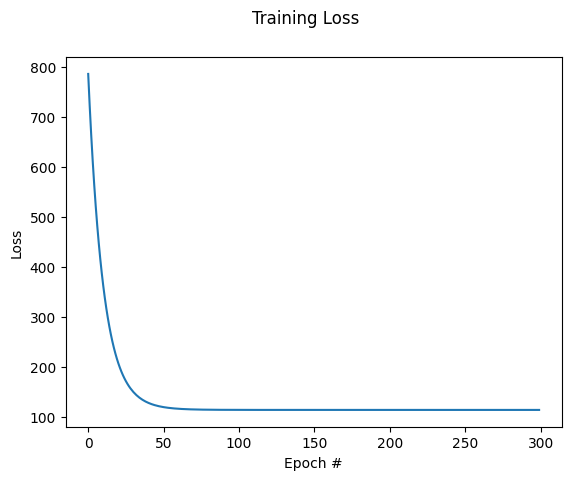

In [4]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-4,4,100)
yy = w * xx + b
plt.plot(xx,yy,c='r')
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Training two features (x1, x2)

In [5]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.02                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)

print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 442.1929920360411 w1= 31.09 w2= 40.58 b= 49.4


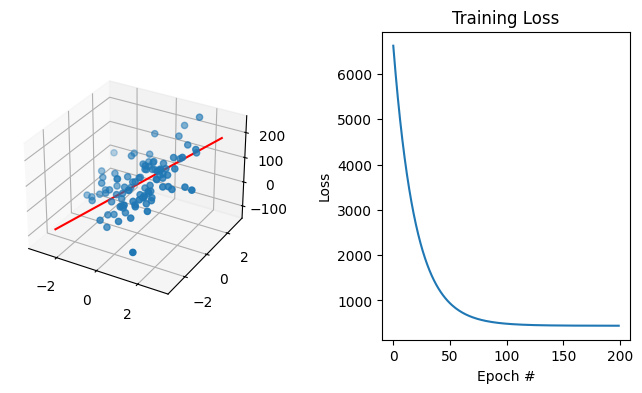

In [6]:
plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100)
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r')

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Using regression function (LinearRegression)

In [7]:
# ex3: using regression classes (LinearRegression and SGDRegressor)

from sklearn.linear_model import LinearRegression, SGDRegressor

n=100
x1, x2 = np.random.randn(n), np.random.randn(n)
y = x1*30 + x2*40 + 50 + np.random.randn(n)*20
X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

# Ordinary least squares (OLS) linear regression

model = LinearRegression()        # create model
model.fit(X,y)                    # train model

print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)


score:  0.8836902343145896
w1= 28.612602702686853 w2= 39.477678640217434 b= 49.0020638562773


In [8]:
# prediction
new_X=[1,3]
print(model.predict([new_X]))
#----
z = np.random.rand(10,2)
model.predict(z)

[196.04770248]


array([ 97.81472335,  82.98158766,  97.29815215, 107.79079776,
        80.35314792,  88.84561245,  65.18088031,  88.55306369,
        87.65287194, 100.136337  ])

w1 = 28.612602702686853, w2 = 39.477678640217434, b = 49.0020638562773


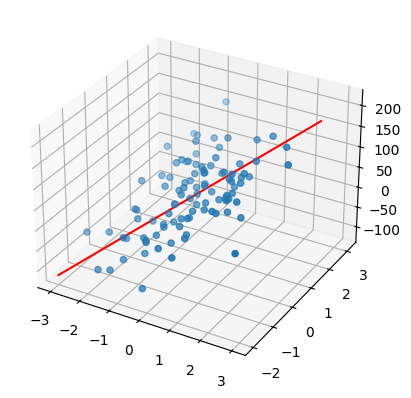

In [9]:
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100)
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r')

In [10]:
model = SGDRegressor()
model.fit(X,y)
print("score = ", model.score(X,y))
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

score =  0.8836900139955346
w1 = 28.592772176509595, w2 = 39.48565281882017, b = [48.99156588]


In [11]:
# normal equation (Ordinary Least Square)
X2 = np.concatenate([X, np.ones(len(X)).reshape(-1,1)], axis=1)
w_ols = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y)
w_ols

array([28.6126027 , 39.47767864, 49.00206386])

## Use make_regression function for training data

In [12]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
X, y = make_regression(n_samples=2000, n_features=2, noise=2.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.71577391 177.02800581  54.17648943 -79.29930148 -41.47720451]


In [13]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9991477009521702

- but, what if the matrix X is singular, i.e. the columns are not independent?
  - you can not use the normal equation.

In [14]:
X.shape, y.shape

((2000, 2), (2000,))

In [15]:
X = np.c_[X, X[:,1]]   # duplicate the second column

In [16]:
X[:5]

array([[ 0.33762316, -0.38981751, -0.38981751],
       [-1.02672037,  2.22938631,  2.22938631],
       [ 0.09896413,  0.63153974,  0.63153974],
       [ 3.97755099, -1.64591196, -1.64591196],
       [ 1.14153039, -0.70330793, -0.70330793]])

In [17]:
np.linalg.matrix_rank(X)   # singular

np.int64(2)

In [18]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9991477009521702

In [19]:
model.coef_, model.intercept_

(array([15.05265346, 42.71741588, 42.71741588]),
 np.float64(1.4168970243244168))

- if the LinearRegression model in scikit-learn encounters a singular matrix, it will automatically remove the duplicated columns from the matrix before computing the coefficients.
- the resulting coefficients for the duplicated features will be the same, since the model treats them as one and the same feature.
- In general, it is better to avoid introducing duplicated or highly correlated columns in the matrix, as this can lead to numerical instability, overfitting, and poor generalization performance of the model.

In [20]:
model = SGDRegressor()
model.fit(X,y)
model.score(X,y)

0.9991473349443409

In [21]:
model.coef_, model.intercept_

(array([15.070629  , 42.69367358, 42.69367358]), array([1.4269908]))

- If a singular matrix is given as input to the SGDRegressor model in scikit-learn, the model may encounter numerical instabilities or errors during the training process. This is because SGDRegressor uses a stochastic gradient descent algorithm to optimize the objective function, which requires computing gradients and updating weights iteratively based on small batches of data.
- When the matrix is singular, the gradients may not be well-defined or may change abruptly, leading to divergence or oscillation of the optimization algorithm. Moreover, the weights may not converge to a stable solution, and the resulting model may be highly sensitive to small perturbations or noise in the data.
- To avoid these issues, it is recommended to preprocess the data and remove any redundant or nearly collinear features before applying the SGDRegressor model. This can be done by performing feature selection, dimensionality reduction, or regularization techniques such as L1 or L2 regularization.
- Alternatively, scikit-learn provides other linear regression models that are better suited for handling singular or ill-conditioned matrices, such as Ridge regression or Lasso regression. These models incorporate regularization or constraint terms that help to stabilize the optimization process and improve the generalization performance of the model.

## Matrix version

In [58]:
np.random.seed(42)
X = np.random.rand(100, 4)
true_w = np.array([1.5, -2.0, 3.0, 0.5])
y = X.dot(true_w) + 1.7 + np.random.randn(100) * 0.5

learning_rate = 0.01
n_iterations = 3000
m = len(y)

# 절편(bias)을 추가하기 위해 X_b에 상수 열(1) 추가
X_b = np.c_[X, np.ones((100, 1))]  # X_b는 (100, 5)
w = np.random.randn(5)  # 초기 가중치 (랜덤 초기화)

# 3. 경사하강법을 통한 최적화
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
    w = w - learning_rate * gradients

# 4. 결과 출력
print("Estimated weights:", w)
print("True weights:", np.concatenate((true_w, [1.7])))  # 절편 포함해서 비교

Estimated weights: [ 1.70492851 -2.28215481  3.05216064  0.35805873  1.80016157]
True weights: [ 1.5 -2.   3.   0.5  1.7]


# Classification (선형분류)

## Linear classification (use Cross Entropy as loss function)

- Logistic Regression classifier
- also called log loss (logistic regression)

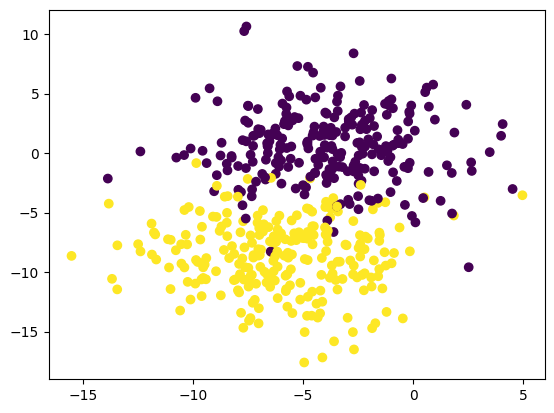

In [23]:
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [24]:
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [25]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))

lossHistory = []
epochs = 300
alpha = 0.005

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction
    preds = np.clip(preds, 1e-9, 1.)                    # clip values for logarithm

    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)

    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1

    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)

0.3570227371842879 -0.407627043592631 1.4877589093530783


In [26]:
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

0.76


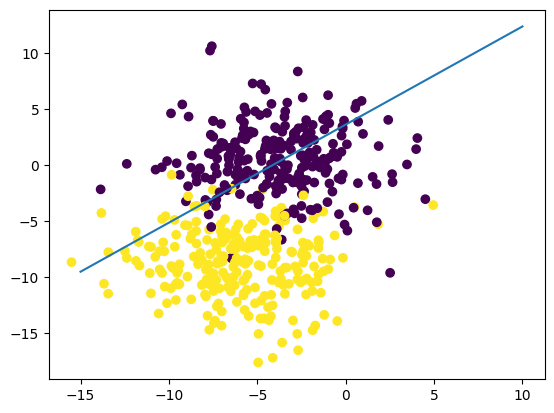

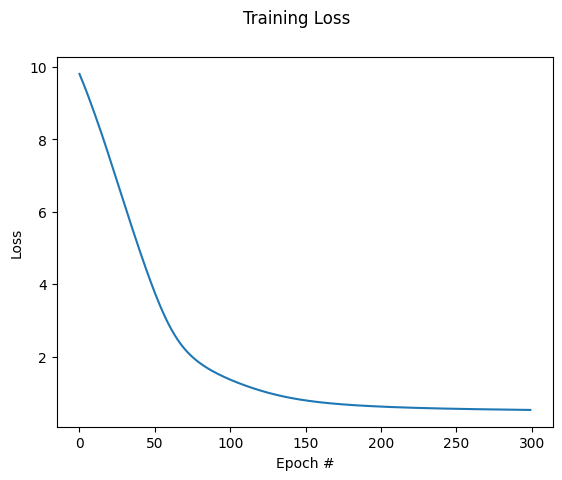

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-15,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Use library function: SGDClassifier()
- default: hinge loss (used in SVM)
  - the library handles the labels appropriately.
  - If you use labels such as 0 and 1, scikit-learn internally manages these without requiring explicit conversion to +1 and -1.

In [28]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)

In [29]:
X.shape, y.shape

((300, 2), (300,))

SGDClassifier:  0.9466666666666667
[[ -7.28564434 -53.15187544]] [-286.58477087]
Logistic Regression:  0.9466666666666667
[[-0.2924121  -0.97341368]] [-5.56262534]

Performance Scores:
0.9466666666666667 0.9466666666666667


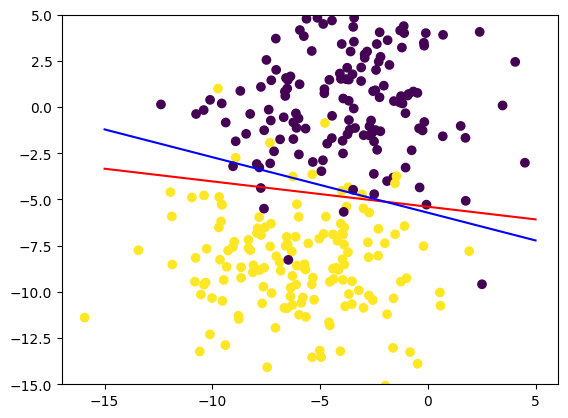

In [30]:
clf = SGDClassifier()
clf.fit(X, y)
print("SGDClassifier: ", clf.score(X,y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()
log.fit(X, y)
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# ---------------
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')
# ---------------
print("\nPerformance Scores:")
print(clf.score(X,y), log.score(X,y))

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = log.predict(X)
confusion_matrix(y, y_pred)

array([[144,   6],
       [ 10, 140]])

In [32]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.93      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [33]:
# Labels (+1, -1) also works in the sklearn library
# 어떤 레이블을 사용하던지 sklearn 모델들은 수용하지만 모델에 따라서
# 내부 알고리즘 구현 상의 이유로 다른 결과를 낼 수 있음.
# 따라서, 표준 레이블 (0,1 또는 +1,-1)을 사용할 것을 권장함.

y = np.where(y == 0, -1, 1)  # change labels {0,1} -> {-1,+1}

clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
log = LogisticRegression()
log.fit(X, y)
print(log.score(X, y))

0.9433333333333334
0.9466666666666667


## Matrix version

In [34]:
np.random.seed(42)
X = np.random.rand(100, 4)  # (100, 4)
true_w = np.array([1.5, -2.0, 3.0, 0.5])
y_prob = 1 / (1 + np.exp(-X.dot(true_w)))
y = (y_prob >= 0.5).astype(int)

learning_rate = 0.1
n_iterations = 1000
m = len(y)

# 절편(bias)을 추가하기 위해 X_b에 상수 열(1) 추가
X_b = np.c_[np.ones((100, 1)), X]  # X_b는 (100, 5) 형상
w = np.random.randn(5)  # 초기 가중치 (랜덤 초기화)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for iteration in range(n_iterations):
    y_pred = sigmoid(X_b.dot(w))  # 예측 확률 계산
    gradients = 1/m * X_b.T.dot(y_pred - y)  # 크로스 엔트로피 손실에 대한 경사
    w = w - learning_rate * gradients  # 가중치 업데이트

y_pred_class = (sigmoid(X_b.dot(w)) >= 0.5).astype(int)  # 0 또는 1로 예측된 클래스
accuracy = np.mean(y_pred_class == y)  # 정확도 계산

print("Estimated weights:", w)
print("True weights:", np.concatenate(([0], true_w)))  # 절편 포함해서 비교
print("Training Accuracy:", accuracy)

Estimated weights: [ 1.09342584  1.90114658 -1.08101468  1.89756951  0.36353421]
True weights: [ 0.   1.5 -2.   3.   0.5]
Training Accuracy: 0.91


## Hinge Loss
- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
- Himge loss for input-output pair (x,y) is given as:
- L = max(0, 1 - yf(x))
- L = 0 (if y*f(x) >= 1), 1-y*f(x) (otherwise)
- dL/dw1 = 0 (if y*f(x) >= 1), -y*x1 (otherwise)
      

In [35]:
N = 200
(X, y_org) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
y = y_org.copy()
y[y==0] = -1
X[:5], y[:5], y_org[:5]

(array([[ -3.81288666,   1.19685212],
        [ -9.05317959, -10.01560306],
        [ -3.06162538,   0.778844  ],
        [ -5.92654858,  -7.63047827],
        [ -5.60959691,  -9.03427239]]),
 array([-1,  1, -1,  1,  1]),
 array([0, 1, 0, 1, 1]))

0.44192662804274446 -0.6245781848354376 0.12545702543691253
Accuracy is: 0.95.


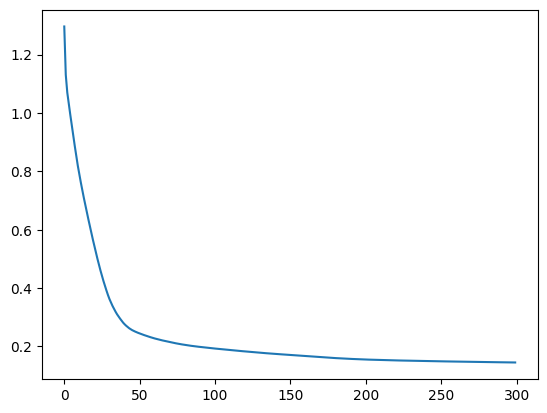

In [36]:
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()
lossHistory = []
epochs = 300
alpha = 0.01

N = len(x1)
for epoch in np.arange(epochs):

    w1_deriv, w2_deriv, b_deriv, loss = 0., 0., 0., 0.
    for i in range(N):
        score = y[i]*(w1*x1[i] + w2*x2[i] + b)
        if score <= 1:
            w1_deriv = w1_deriv - x1[i]*y[i]
            w2_deriv = w2_deriv - x2[i]*y[i]
            b_deriv = b_deriv - y[i]
            loss = loss + (1 - score)   # psi = 1- score
        # else : derivatives are zero. loss is 0
    w1_deriv /= float(N)      # mean
    w2_deriv /= float(N)
    b_deriv  /= float(N)
    loss /= float(N)

    w1 = w1 - alpha * w1_deriv
    w2 = w2 - alpha * w2_deriv
    b  =  b - alpha *  b_deriv

    lossHistory.append(loss)

print(w1, w2, b)

accuracy = ((w1*x1 + w2*x2 + b > 0) == y_org).sum()/N
print("Accuracy is: {}.".format(accuracy))
plt.plot(lossHistory)

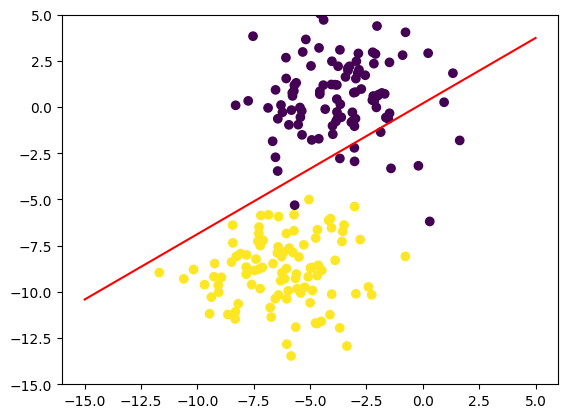

In [37]:
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

# Normal Equation

In [38]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

Text(0, 0.5, 'Target')

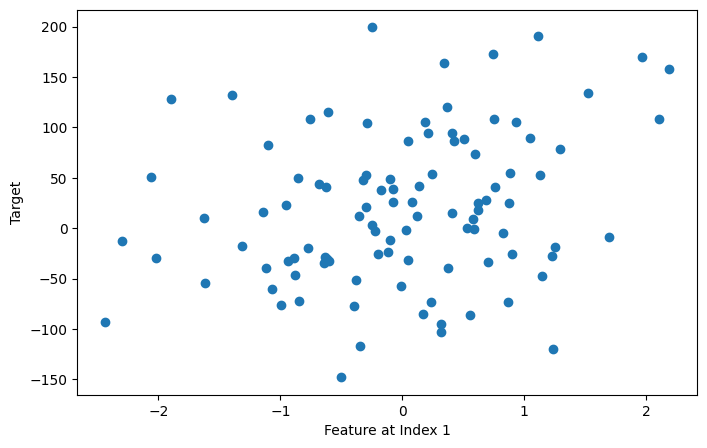

In [39]:
X, y = make_regression(n_samples=100,
                       n_features=2,
                       noise=10,
                       random_state=1)

plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 0], y, marker='o')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")

In [40]:
X.shape, y.shape

((100, 2), (100,))

In [41]:
# linear regression
X_sc = StandardScaler().fit_transform(X)
# print(X_sc[:5], y[:5])
model = SGDRegressor(max_iter=1000, alpha=0.1)
model.fit(X_sc,y)
print("coefficients and bias: ", model.coef_, model.intercept_)
model.score(X_sc,y)

model.predict(X_sc[:5])

coefficients and bias:  [25.94701293 64.86940817] [19.2553505]


array([ 64.33437603, -29.29390123, -32.40452945,  -7.12714149,
       -36.39851933])

In [42]:
from sklearn.linear_model import LinearRegression, SGDRegressor

model = LinearRegression()
model.fit(X_sc, y)
print(model.coef_, model.intercept_)
model.score(X_sc,y)

[29.52899512 71.88859745] 19.280815955500472


0.9818249824413999

- normal equation:
  - y = XW
  - W* = (X_{T}X)_{-1}X_{T}y

In [43]:
# normal equation
X = X_sc    # scaled (but, actually you don't need scaling here.)
X_b = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("weight: ", w_best[:-1], "bias: ", w_best[-1])

# prediction for the first 5 (y = XW)
Xt = X[:5]
Xt_b = np.concatenate([Xt, np.ones((Xt.shape[0], 1))], axis=1)
Xt_b.dot(w_best)

weight:  [29.52899512 71.88859745] bias:  19.28081595550047


array([ 69.28675103, -36.17117272, -38.2733512 , -11.02296748,
       -43.112981  ])

#  OLS(Ordinary Least Squares, 최소자승법) model

In [44]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const)
results = model_sm.fit()
print(results.params, results.rsquared)
print(results.summary())

[19.28081596 29.52899512 71.88859745] 0.9818249824413999
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2620.
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           3.84e-85
Time:                        12:08:49   Log-Likelihood:                -372.50
No. Observations:                 100   AIC:                             751.0
Df Residuals:                      97   BIC:                             758.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

- Scikit-learn (LinearRegression): 예측에 초점을 맞춘다. 모델이 데이터를 얼마나 잘 설명하는지 보는 기본적인 지표로 R-squared를 기본값으로 제공한다.
- Statsmodels (OLS): 통계적 추론과 분석에 초점을 맞춘다. 변수 개수에 따른 모델 성능 왜곡 가능성을 인지하고, 이를 보정한 조정 R-squared를 함께 제공하여 연구자가 더 정확하게 모델을 평가하도록 돕는다.

# Exercise

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier
from sklearn.datasets import make_regression, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [46]:
def show_plot(model, X, i):
    df = pd.DataFrame(X)
    coef = pd.Series(model.coef_, df.columns)
    plt.subplot(1,3,i)
    coef.plot(kind='bar', title='model coefficients')

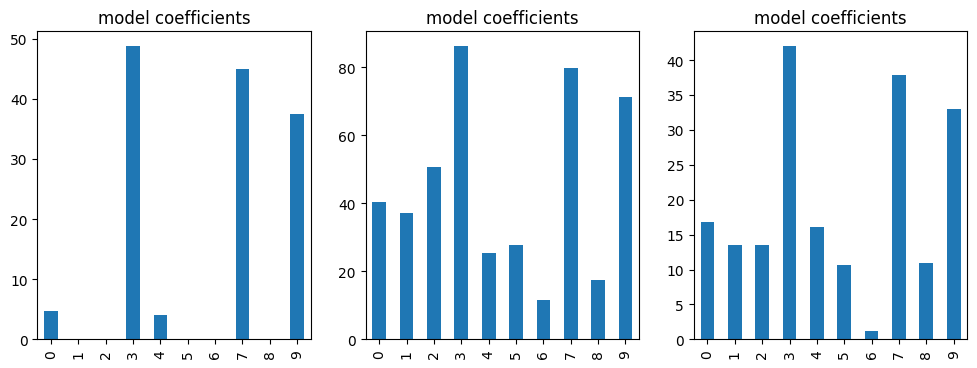

In [47]:
X, y = make_regression(n_samples=100, n_features=10, noise=30, random_state=1)
X = StandardScaler().fit_transform(X)

clf1, clf2, clf3 = (Lasso(alpha = 30), LinearRegression(), Ridge(alpha = 100))
clfs = [clf1, clf2, clf3]
plt.figure(figsize=(12,4))
for i, clf in enumerate(clfs, 1):
    clf.fit(X, y)
    show_plot(clf, X, i)

0.97
[[-25.63309603 -50.33844547]] [-263.31189105]


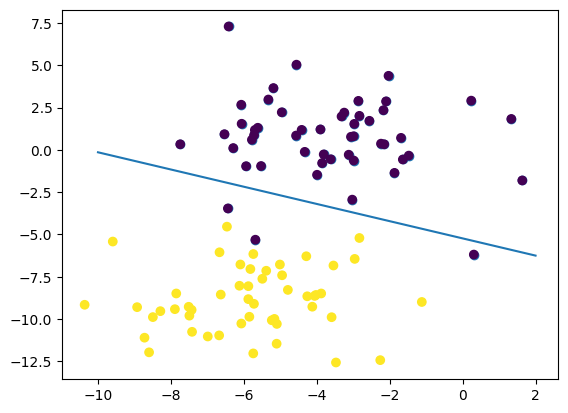

In [48]:
(X, y) = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, random_state=17)
markers = ['o','+']
for i in range(2):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.scatter(X[:,0], X[:,1], c=y)
clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_, clf.intercept_)
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]
xx = np.linspace(-10,2,100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)